<a href="https://colab.research.google.com/github/sarker2018/VIsaualisation/blob/main/R_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scatter Plot with time evolution


Warning message:
“Removed 1 rows containing missing values (geom_segment).”


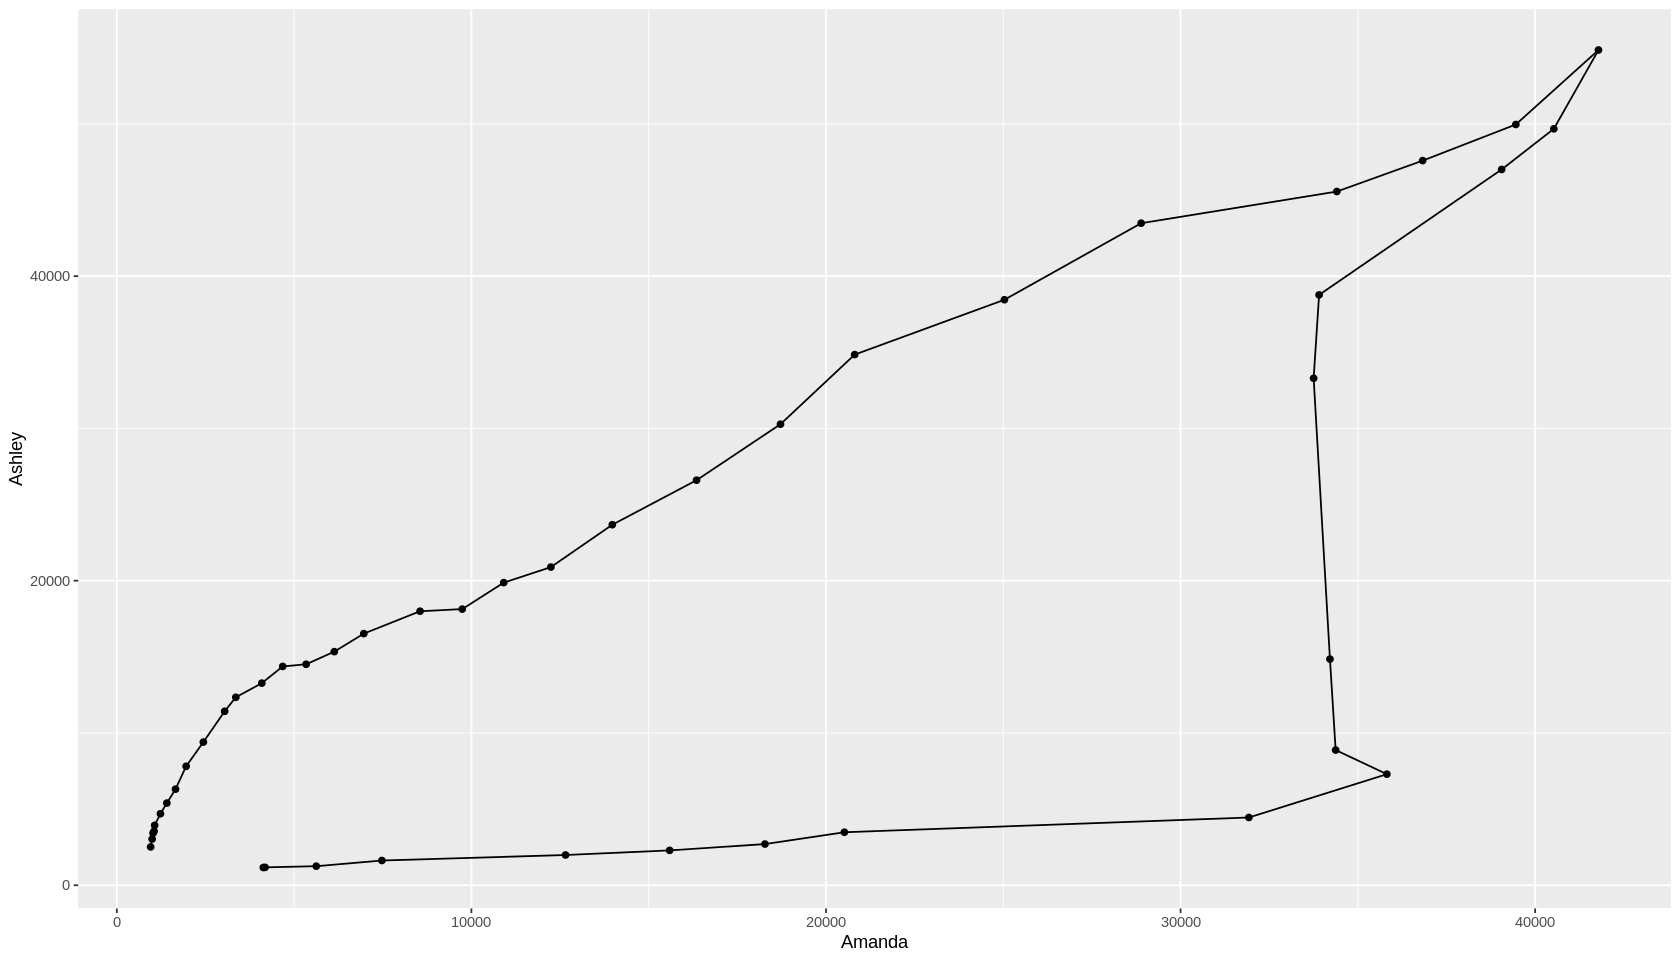

In [15]:
# Libraries
library(ggplot2)
library(dplyr)
library(babynames)
library(ggrepel)
library(tidyr)

# data
data <- babynames %>% 
  filter(name %in% c("Ashley", "Amanda")) %>%
  filter(sex=="F") %>%
  filter(year>1970) %>%
  select(year, name, n) %>%
  spread(key = name, value=n, -1)

# plot

# Define your custom plot size
options(repr.plot.width = 14, repr.plot.height = 8)
data %>% 
  ggplot(aes(x=Amanda, y=Ashley, label=year)) +
     geom_point() +
     geom_segment(aes(
                    xend=c(tail(Amanda, n=-1), NA), 
                    yend=c(tail(Ashley, n=-1), NA)
                  )
      ) 

In [20]:
install.packages('hrbrthemes')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gdtools’


Warning message in install.packages("hrbrthemes"):
“installation of package ‘gdtools’ had non-zero exit status”
Warning message in install.packages("hrbrthemes"):
“installation of package ‘hrbrthemes’ had non-zero exit status”


Warning message:
“Removed 1 rows containing missing values (geom_segment).”


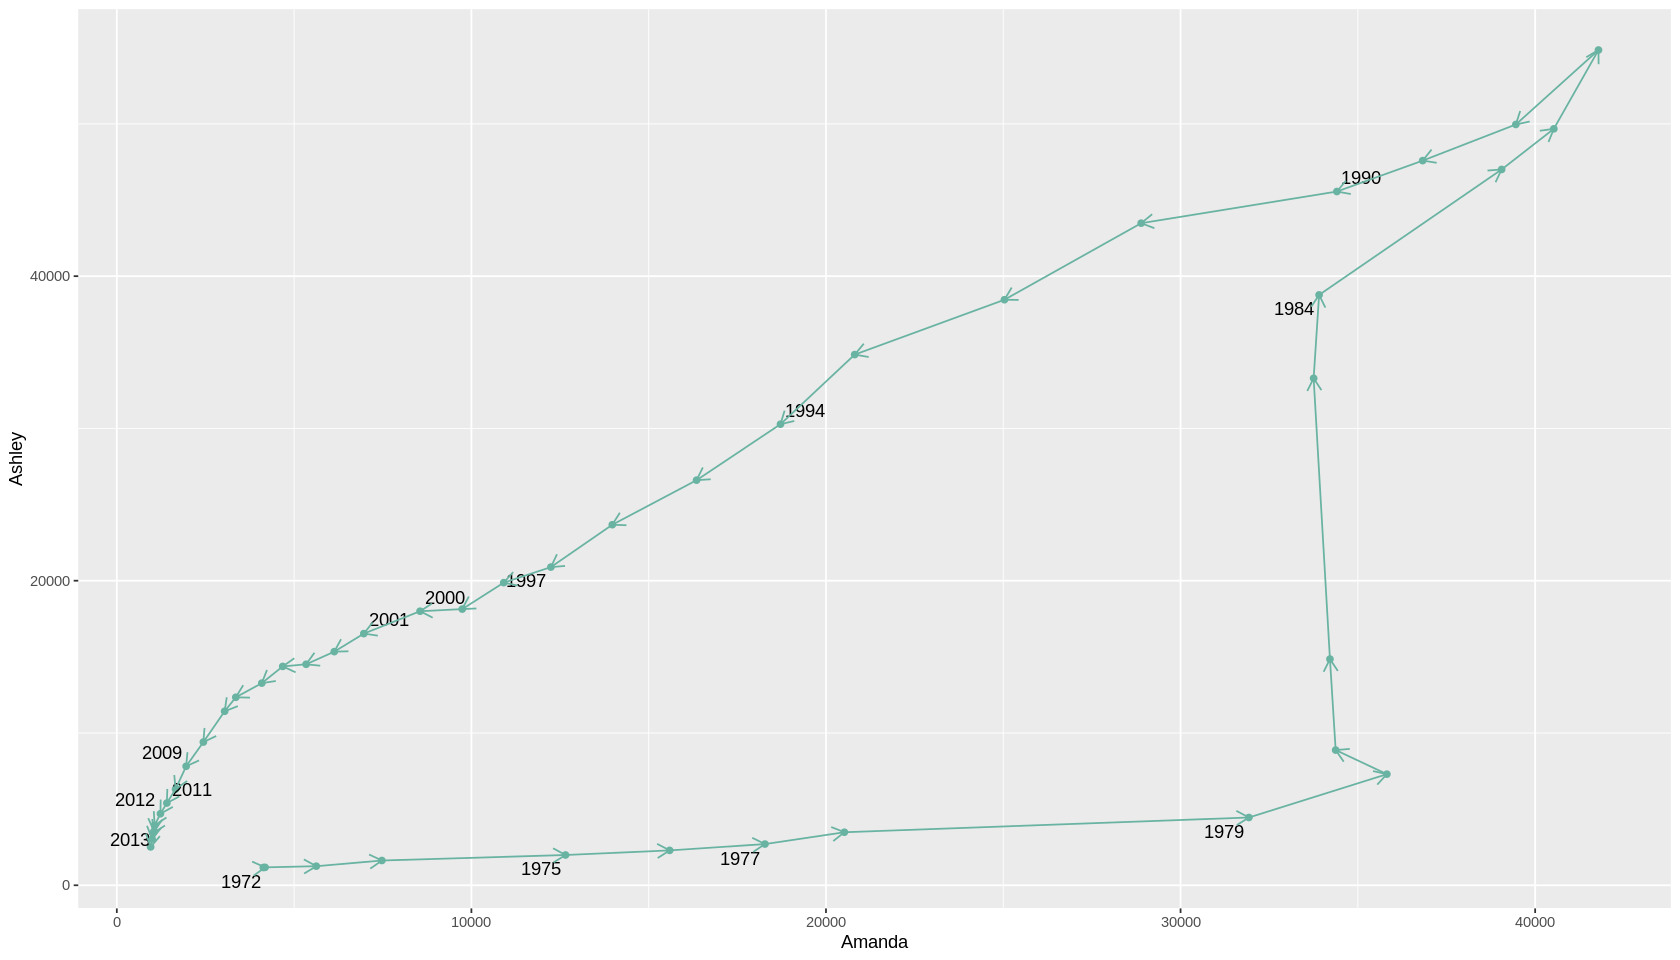

In [23]:
# Libraries
library(ggplot2)
library(dplyr)
library(babynames)
library(ggrepel)
library(tidyr)


# data
data <- babynames %>% 
  filter(name %in% c("Ashley", "Amanda")) %>%
  filter(sex=="F") %>%
  filter(year>1970) %>%
  select(year, name, n) %>%
  spread(key = name, value=n, -1)

# Select a few date to label the chart
tmp_date <- data %>% sample_frac(0.3)

# plot 
data %>% 
  ggplot(aes(x=Amanda, y=Ashley, label=year)) +
     geom_point(color="#69b3a2") +
     geom_text_repel(data=tmp_date) +
     geom_segment(color="#69b3a2", 
                  aes(
                    xend=c(tail(Amanda, n=-1), NA), 
                    yend=c(tail(Ashley, n=-1), NA)
                  ),
                  arrow=arrow(length=unit(0.3,"cm"))
      ) 
      

## Mirror Histogram

```r
install.packages('hrbrthemes')
library(ggplot2)
library(hrbrthemes)

# Dummy data
data <- data.frame(
  var1 = rnorm(1000),
  var2 = rnorm(1000, mean=2)
)

# Chart
plot <- ggplot(data, aes(x=x) ) +
  # Top
  geom_density( aes(x = var1, y = ..density..), fill="#69b3a2" ) +
  geom_label( aes(x=4.5, y=0.25, label="variable1"), color="#69b3a2") +
  # Bottom
  geom_density( aes(x = var2, y = -..density..), fill= "#404080") +
  geom_label( aes(x=4.5, y=-0.25, label="variable2"), color="#404080") +
  theme_ipsum() +
  xlab("value of x")


```



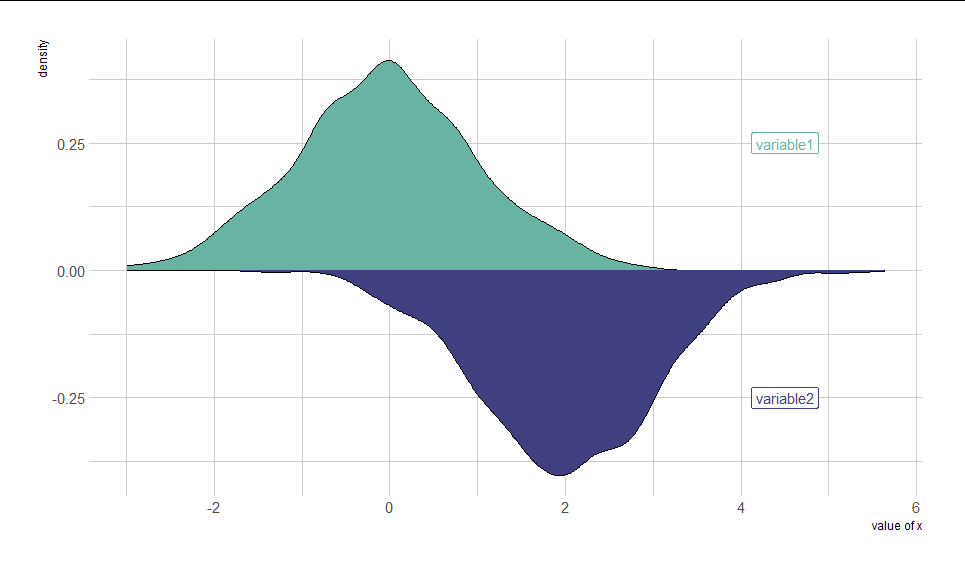